# Dipak Dulal

## Houses Prices Prediction - Advanced Regression Technique
### Data Preprocessing


#### Importing Necessary library


In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [2]:
train_data = pd.read_csv('train.csv',sep = ',')
test_data = pd.read_csv('test.csv',sep = ',')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# check shape
train_data.shape,test_data.shape

((1460, 81), (1459, 80))

## Handling Missing Values and Some Irrelevant Features
####  Dropping the columns which has more than 40% information are null and ID 
#### Dropping two columns: 'Street' and 'Utilities' ,which have same values in each row




The columns dropped are,'Alley','Fireplaces','PoolQC','Fence','MiscFeature','FireplaceQu'

In [4]:
#droping the columns
def handle_missing(train_data):
    train_data = train_data.drop(['Id','Alley','Fireplaces','PoolQC','Fence','MiscFeature','FireplaceQu','Street','Utilities'],axis = 1)
    #test_data = test_data.drop(['Id','Alley','Fireplaces','PoolQC','Fence','MiscFeature','FireplaceQu','Street','Utilities'], axis = 1)


#electrical has only one null value ando only value 'Mix' and dropping the row containing them
    row1 = train_data['Electrical'] != 'Mix' # the column has only one 'Mix'
    train_data = train_data[row1]

# Electrical has only one null value so replace it by mode value
    train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0]) # only one null value
    train_data['MasVnrType'] = train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0]) # only 8 null value and categorical
    train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0) #8 null and numerical so replaced by 0


# LotFrontage is the distance from nearest main street so it is better to replace null by median

    train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())

# Following column are categorical and have null values are replaced by None
    for item in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']:
        train_data[item] = train_data[item].fillna('None')
    
# GarageYrblt is numerical so null values are replaced by 0
    train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(0)


# checking missing values
    return train_data


In [5]:
# managing all the missing values using above funciton

train_data = handle_missing(train_data)
test_data = handle_missing(test_data)
test_data = test_data.fillna(0)

In [6]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,32,0,0,0,0,700,7,2006,WD,Normal


### Feature Engineering

In [7]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scre

In [8]:
train_data_set1 = train_data[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF','SalePrice']]
train_data_set2 = train_data[['2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']]

### Exploring the Correlation between the target variable and other features

<AxesSubplot:>

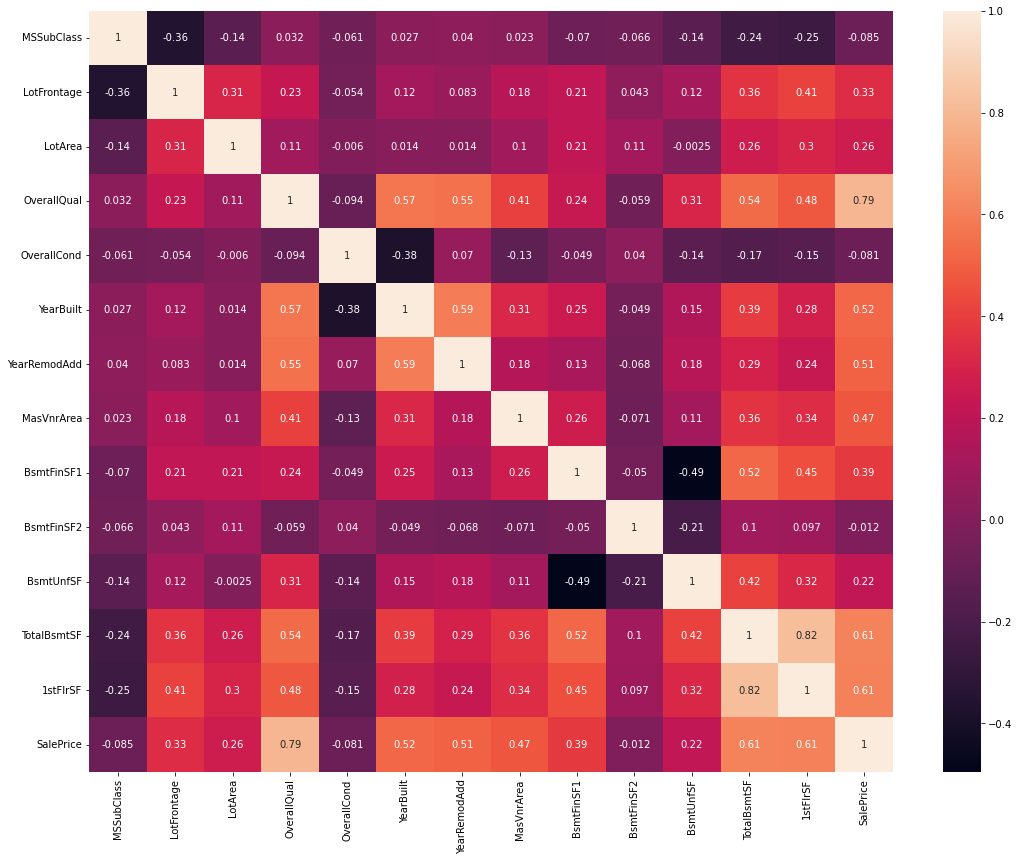

In [9]:
corr = train_data_set1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 14))
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(corr,annot = True)

### Since, some features have really low correlation with our target feature Sale Price. Those variable might not contribute to predict our house price, instead might create noise on our model execution. So, I decided to create a practical threshold 0.01 to exclude some of of the features

<AxesSubplot:>

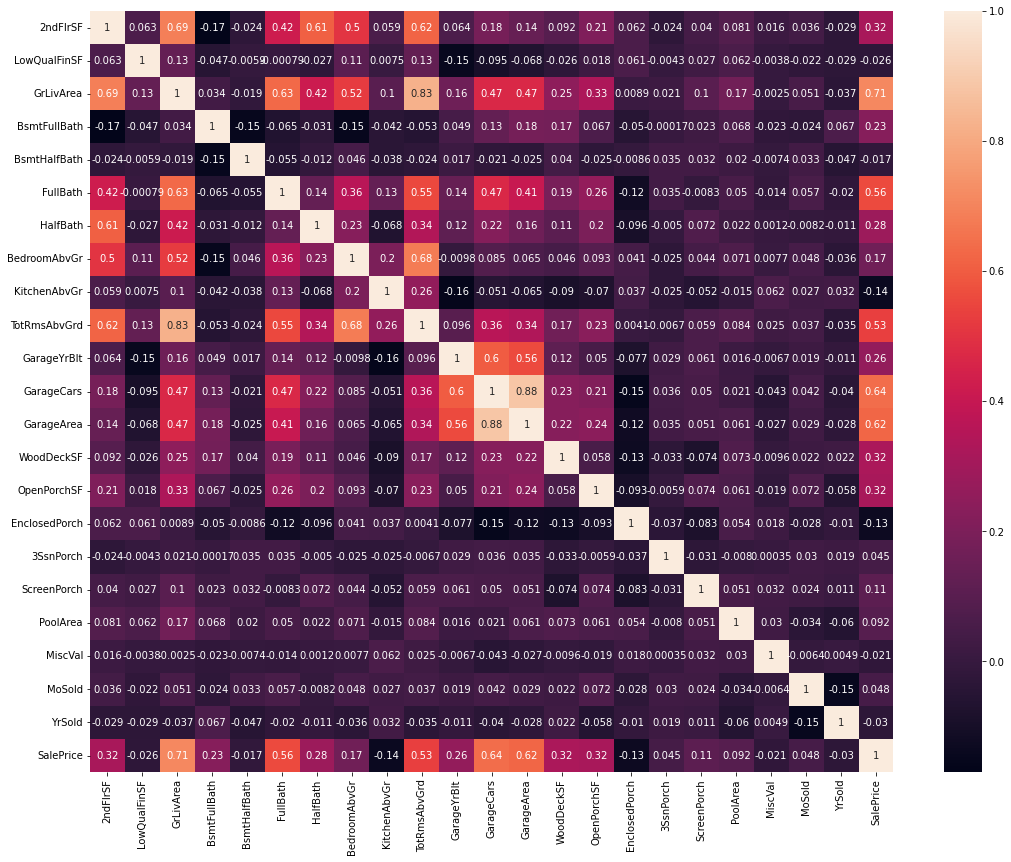

In [10]:
corr = train_data_set2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 14))
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(corr,annot = True)

Text(0.5, 0.98, 'Heatmap of highly correlated freatures with sale price(abs(corr) >= 0.01)')

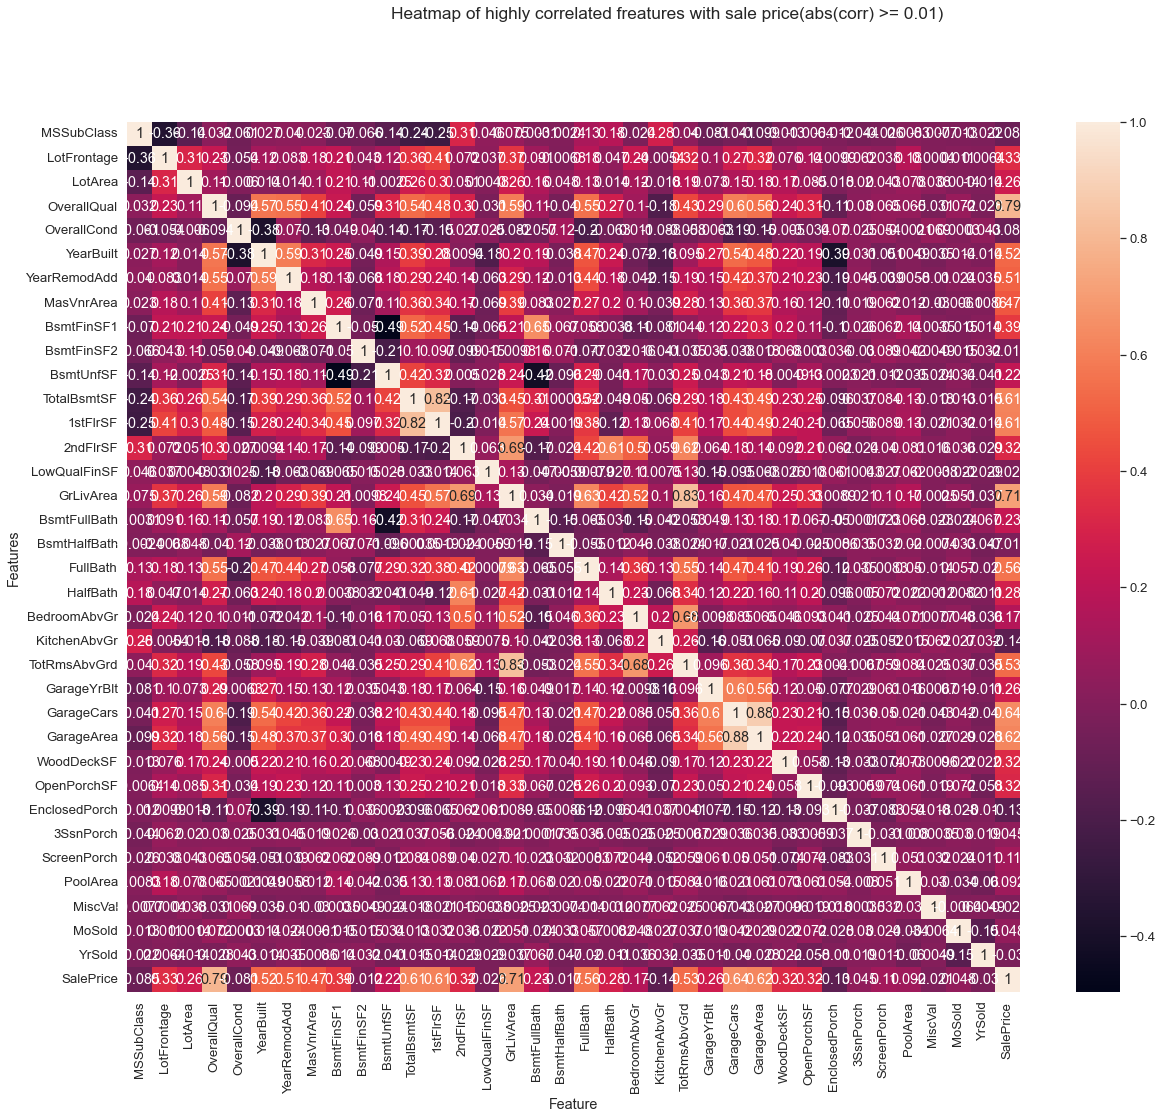

In [11]:
# Extract the correlation Feature map with having correlation > 0.2 with Sale Price
cor_mat = train_data.corr()
sns.set(font_scale = 1.2)
plt.figure(figsize = (20,16))
corr_top = cor_mat.index[abs(cor_mat['SalePrice']) >= 0.01]
hm = sns.heatmap(train_data[corr_top].corr(),annot = True)
plt.xlabel('Feature')
plt.ylabel('Features')
plt.suptitle('Heatmap of highly correlated freatures with sale price(abs(corr) >= 0.01)')

In [12]:
corr_top

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Excluding those columns which has absolute of correlation less than 0.01

In [13]:
# Extract only those features which have abs(corr) >= 0.01

train_data = train_data[corr_top]

# test data does not have Sale Price
test_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
test_data = test_data[test_cols]

In [14]:
# dropping the columns which has majority of null
#train_data = train_data.drop(['Id','PoolQC','MiscFeature','Alley','Fence','LotFrontage','FireplaceQu'],axis = 1)
#test_data = test_data.drop(['Id','PoolQC','MiscFeature','Alley','Fence','LotFrontage','FireplaceQu'],axis = 1)
# Drop those column which has same values for all entries
#train_data = train_data.drop(['Street','Utilities'],axis = 1)

In [15]:
#train_data['LotShape'] = train_data['LotShape'].astype('category').cat.codes

In [16]:
train_data.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,69.5,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000



## Exploring Pair Plot and Exclude some Outliers

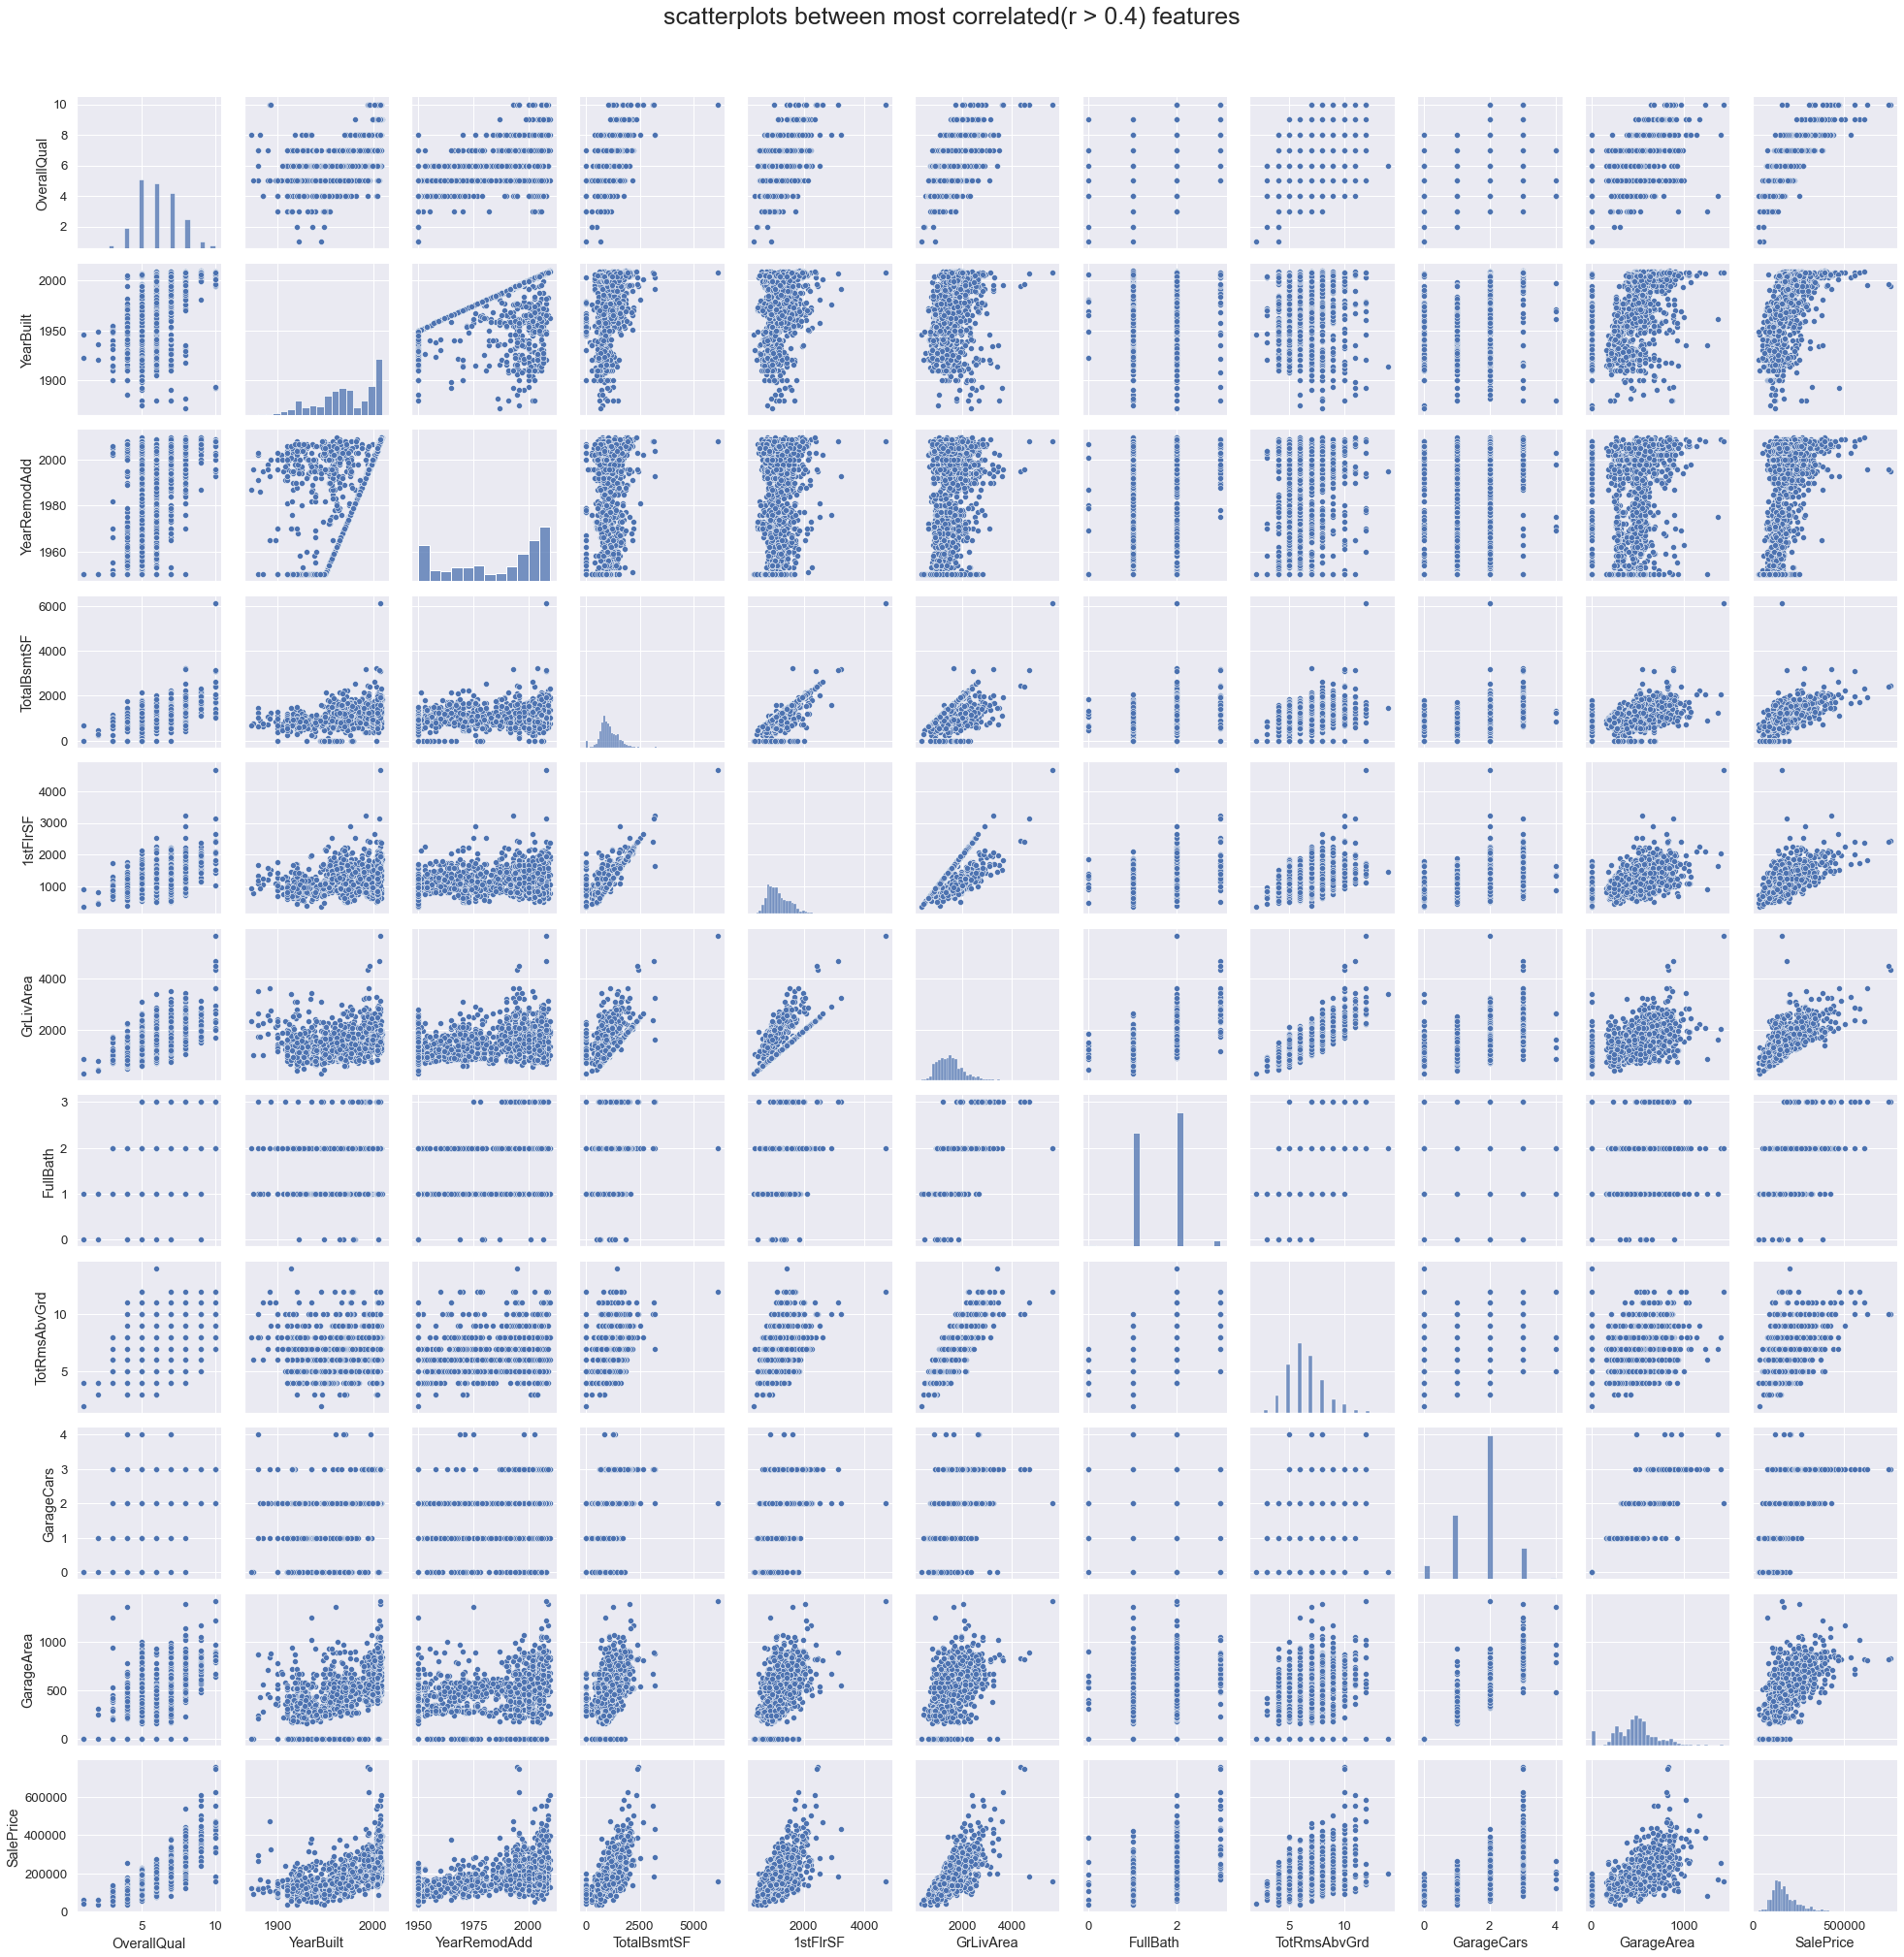

In [17]:
# figure size
rcParams['figure.figsize'] = 6,6
columns = cor_mat.index[abs(cor_mat['SalePrice']) > 0.5]
sns_plot = sns.pairplot(train_data[columns])
plt.suptitle('scatterplots between most correlated(r > 0.4) features', y = 1.02,size = 25)
plt.tight_layout()
plt.show()


### Handling Outliers

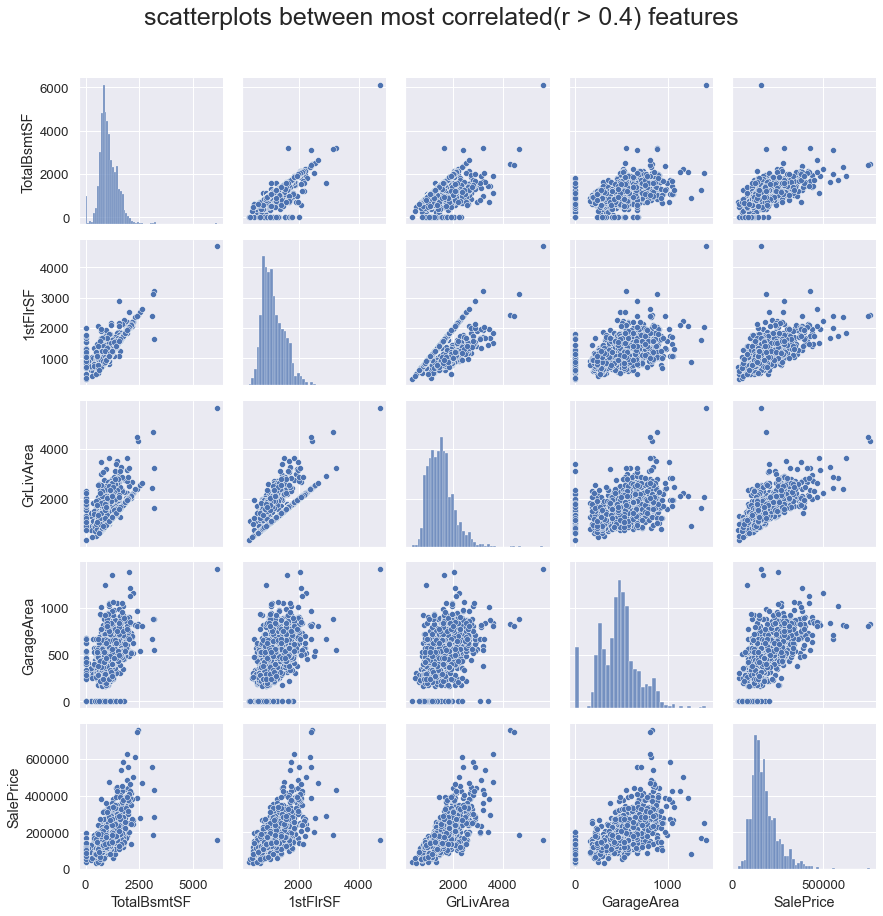

In [18]:
# from above pairplot extracting the columns that have ourliers 
cols = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','SalePrice']
# figure size
rcParams['figure.figsize'] = 6,6
columns = cols
sns_plot = sns.pairplot(train_data[columns])
plt.suptitle('scatterplots between most correlated(r > 0.4) features', y = 1.02,size = 25)
plt.tight_layout()
plt.show()

### From above pairplot we observed some outliers and we exclude those outliers from Train Data

In [19]:
 # excluding the outliers from training data
train_data = train_data.drop(train_data[train_data['TotalBsmtSF'] > 6000].index)
train_data = train_data.drop(train_data[train_data['1stFlrSF'] > 4000].index)
train_data = train_data.drop(train_data[train_data['GrLivArea'] > 4000].index)
train_data = train_data.drop(train_data[train_data['GarageArea'] > 4500].index)
train_data = train_data.drop(train_data[train_data['SalePrice'] > 700000].index)

In [20]:
 # excluding the outliers from testing data
#test_data = test_data.drop(test_data[test_data['TotalBsmtSF'] > 6000].index)
#test_data = test_data.drop(test_data[test_data['1stFlrSF'] > 4000].index)
##test_data = test_data.drop(test_data[test_data['GrLivArea'] > 4000].index)
#test_data = test_data.drop(test_data[test_data['GarageArea'] > 4500].index)


In [21]:
test_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


#### Use Distplot for the SalePrice

C:\Users\dpdulal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

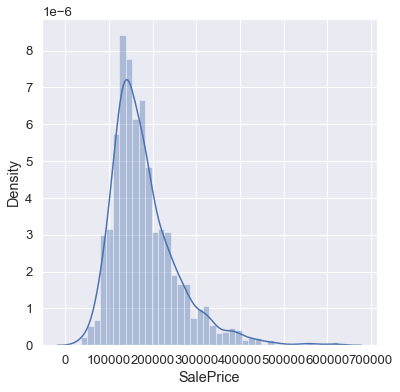

In [22]:
sns.distplot(train_data['SalePrice'])

C:\Users\dpdulal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

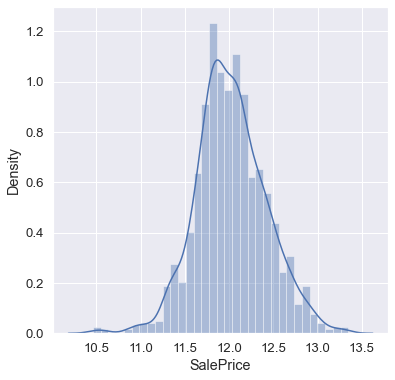

In [23]:
train_data_log = np.log(train_data['SalePrice'])
sns.distplot(train_data_log)

#### Since taking the logarithm of the target varible give more symmetrical data. So using log of the price for the training purpose

In [24]:
#test_data[cat_cols]=test_data[cat_cols].apply(lambda x: pd.factorize(x)[0] + 1)

In [25]:
train_data['LogPrice'] = train_data_log

In [26]:
# get dummy values for encoding the categorical data
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [27]:
train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LogPrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,40,0,0,0,0,0,8,2007,175000,12.072541
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,0,0,2,2010,210000,12.254863
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,60,0,0,0,0,2500,5,2010,266500,12.493130
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,112,0,0,0,0,4,2010,142125,11.864462


   ### Preparing for the Data to train, test and cros validation

In [28]:
# for training purpose exclude the target variables from the training data
X = train_data.drop(['SalePrice','LogPrice'], axis = 1)
y = train_data['LogPrice']

## Split into train, validation

In [29]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.25,random_state = 10)

In [30]:
X_train.shape,y_train.shape

((1091, 35), (1091,))

##  1. Linear Regression Model

In [31]:
lm_model = LinearRegression()
lm_model.fit(X_train,y_train)
print(lm_model)

LinearRegression()


In [32]:
print(lm_model.intercept_)

18.345017933562474


In [33]:
#print(lm_model.coef_)

In [34]:
predictions = lm_model.predict(X_val)
predictions = predictions.reshape(-1,1)

In [35]:
sub_kaggle_prediction = np.exp(predictions)

In [36]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val,sub_kaggle_prediction)))
print('MAE:', metrics.mean_absolute_error(y_val,sub_kaggle_prediction))
print('MSE:', metrics.mean_squared_error(y_val,sub_kaggle_prediction))

RMSE: 193630.18075048664
MAE: 178556.42984326402
MSE: 37492646897.466125


### Optimizing Result, Tuning Hyperparamenter using GridSearchCV function
GridSearchCV is a technique that exhaustively searches over a specified hyperparameter grid, which is a set of possible hyperparameter values for a given model. It performs an exhaustive search over all possible combinations of hyperparameter values, and evaluates each combination using cross-validation.

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
lin_reg = LinearRegression() # call linear regression model
params_linreg = {'fit_intercept': [True,False],'normalize':[True,False],'copy_X':[True,False]}
gridcv_lin = GridSearchCV(lin_reg,params_linreg,verbose = 1, scoring = 'r2')
gridcv_lin.fit(X_train,y_train)
print('Linear Regression Model : ' + str(gridcv_lin.best_estimator_))
print('Best Score :',str(gridcv_lin.best_score_))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Linear Regression Model : LinearRegression(normalize=False)
Best Score : 0.895597263118354


In [39]:
lin_reg = gridcv_lin.best_estimator_
lin_reg.fit(X_train,y_train)
lin_pred = lin_reg.predict(X_val)

#R^2 score
R2_score_lin = r2_score(y_val,lin_pred)

# RMSE score
rmse_score_lin = np.sqrt(mean_squared_error(y_val,lin_pred))

# Cross Validation Score
cross_val_score_lin = cross_val_score(lin_reg,X_train,y_train,cv =12 , scoring = 'r2')

print('R^2 Score :'+ str(R2_score_lin))
print('RMSE Score :' + str(rmse_score_lin))
print('Cross Validation Score :' + str(np.mean(cross_val_score_lin)))

R^2 Score :0.8802961615696405
RMSE Score :0.142175395018358
Cross Validation Score :0.8961350363759569


## 2. Gradient Boosting Regression Model

In [40]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor

In [41]:

gb_clf = GradientBoostingRegressor(n_estimators=400, learning_rate= 0.1,max_depth=3,max_features = 30,min_samples_split = 2,
                                  loss = 'ls',random_state=22).fit(X_train, y_train)

In [42]:
gb_pred = gb_clf.predict(X_val)
gb_pred = gb_pred.reshape(-1,1)
R2_gb = r2_score(y_val,gb_pred)
rmse_gb = np.sqrt(mean_squared_error(y_val,gb_pred))
print('R^2 Score : ' + str(R2_gb))
print('RMSE Score: ' + str(rmse_gb))

R^2 Score : 0.8898908731733798
RMSE Score: 0.1363584527029757


In [43]:
cross_score_gb = cross_val_score(gb_clf,X_train,y_train,cv = 10,scoring = 'r2')
print('Cross Validation Score: ' + str(np.mean(cross_score_gb)))

Cross Validation Score: 0.8871692855215855


## 3. Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dt_clf = DecisionTreeRegressor(random_state = 100)
params_dt = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dt = GridSearchCV(dt_clf,params_dt,verbose = 1,scoring = 'r2')
grid_dt.fit(X_train,y_train)
print('Decision Tree Model: ' + str(grid_dt.best_estimator_))
print('Best Score: ' + str(grid_dt.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Decision Tree Model: DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      min_samples_split=10, random_state=100)
Best Score: 0.738757474573064


In [46]:
dt = grid_dt.best_estimator_
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_val)
R2_dt = r2_score(y_val,dt_pred)
rmse_dt = np.sqrt(mean_squared_error(y_val,dt_pred))
print('R^2 Score: ' + str(R2_dt))
print('RMSE Score: ' + str(rmse_dt))

R^2 Score: 0.6839875320466005
RMSE Score: 0.23100560312832794


In [47]:
cross_score_dt = cross_val_score(dt_clf,X_train,y_train,cv = 10,scoring = 'r2')
print('Cross Validation Score: ' + str(np.mean(cross_score_gb)))

Cross Validation Score: 0.8871692855215855


## 4. Neural Network Regression

In [48]:
# Make Prediction
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes = (6220,),activation = 'logistic',learning_rate = 'adaptive',
    random_state = 5,max_iter = 10000).fit(X_train,y_train)
pred_mlp = mlp.predict(X_val)
R2_mlp = mlp.score(X_val,y_val)
rmse_mlp = np.sqrt(mean_squared_error(y_val,pred_mlp))
print('R_sqared_value: ', R2_mlp)
print('RMSE:', rmse_mlp)
cross_score_ml = cross_val_score(mlp,X_train,y_train,cv = 10,scoring = 'r2')
print('Cross Validation Score: ' + str(np.mean(cross_score_ml)))

R_sqared_value:  0.7142593636008727
RMSE: 0.21966274630996466
Cross Validation Score: 0.6852013368407397


## 5.  Lasso Model

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lm = Lasso(alpha = 0.008,max_iter = 1000,selection= 'random',positive = True,warm_start = True,tol = 1e-3).fit(X_train,y_train)
pred_lm = lm.predict(X_val)
R2_lm = lm.score(X_val,y_val)
rmse_lm = np.sqrt(mean_squared_error(y_val,pred_lm))
print('R_sqared_value: ', R2_lm)
print('RMSE:', rmse_lm)
cross_score_lm = cross_val_score(lm,X_train,y_train,cv = 8)
print('Cross Validation Score: ' + str(np.mean(cross_score_lm)))

R_sqared_value:  0.8857675439832589
RMSE: 0.1388881401585481
Cross Validation Score: 0.8911830453571165


## 6.  Ransom Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(max_depth = 20,min_samples_split = 5, random_state = 2,max_features = 'log2').fit(X_train,y_train)
pred_rf = rf.predict(X_val)
R2_rf = rf.score(X_val,y_val)
rmse_rf = np.sqrt(mean_squared_error(y_val,pred_rf))
print('R_sqared_value: ', R2_rf)
print('RMSE:', rmse_rf)
cross_score_rf = cross_val_score(rf,X_train,y_train,cv = 10,scoring = 'r2')
print('Cross Validation Score: ' + str(np.mean(cross_score_lm)))

R_sqared_value:  0.8631458240968742
RMSE: 0.15201954631458847
Cross Validation Score: 0.8911830453571165


## 7.  Support Vector Regression

In [53]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline


In [54]:
sv = SVR(kernel = 'linear',C = 1.0,epsilon = 0.002,tol = 1e-2,degree = 3)
svr = make_pipeline(StandardScaler(),sv).fit(X,y)

pred_svr = svr.predict(X_val)
R2_sv = svr.score(X_val,y_val)
rmse_sv = np.sqrt(mean_squared_error(y_val,pred_svr))
print('R_sqared_value: ', R2_sv)
print('RMSE:', rmse_sv)
cross_score_svr = cross_val_score(svr,X_train,y_train,cv = 10,scoring = 'r2')
print('Cross Validation Score: ' + str(np.mean(cross_score_svr)))

R_sqared_value:  0.8877600249798943
RMSE: 0.13767154488070524
Cross Validation Score: 0.8946207515772515


## 8.  Bayesian Ridge Regression

In [55]:
from sklearn.linear_model import BayesianRidge

In [56]:
br = BayesianRidge(n_iter = 1000,tol = 0.001,alpha_1 = 1e-5, alpha_2 = 1e-5,compute_score = True).fit(X_train,y_train)
pred_br = br.predict(X_val)
R2_br = br.score(X_val,y_val)
rmse_br = np.sqrt(mean_squared_error(y_val,pred_br))
print('R_sqared_value: ',R2_br)
print('RMSE:',rmse_br)
cross_score_br = cross_val_score(br,X_train,y_train,cv = 10,scoring = 'r2')
print('Cross Validation Score: ' + str(np.mean(cross_score_br)))

R_sqared_value:  0.8830461761394257
RMSE: 0.140532773727271
Cross Validation Score: 0.8950411462160502


##  Comparison over the Models

In [57]:
Performance_of_models = pd.DataFrame({
    "Model" : ["Linear Regression", "Gradient Boosting", "Decision Tree", "Neural Network Regressor","Lasso Model","Random Forest","Support Vector Regressor","Bayesian Ridge Regressor"],
    "R Squared" : [str(R2_score_lin)[0:8], str(R2_gb)[0:8],  str(R2_dt)[0:8], str(R2_mlp)[0:8] , str(R2_lm)[0:5], str(R2_rf)[0:8], str(R2_sv)[0:8], str(R2_br)[0:8]],
    "RMSE" : [str(rmse_score_lin)[0:8], str(rmse_gb)[0:8],  str(rmse_dt)[0:8], str(rmse_mlp)[0:8], str(rmse_lm )[0:8], str(rmse_rf)[0:8], str(rmse_sv)[0:8], str(rmse_br)[0:8]],
    "Cross_Val_Score" :[str(cross_val_score_lin)[1:8], str(cross_score_gb)[1:8],  str(cross_score_dt)[1:8], str(cross_score_ml)[1:8], str(cross_score_lm )[1:8], str(cross_score_rf)[1:8], str(cross_score_svr)[1:8], str(cross_score_br)[1:8]]
})
Performance_of_models.round(4)

print("Sorted by R Squared:")
Performance_of_models.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


,Model,R Squared,RMSE,Cross_Val_Score
1,Gradient Boosting,0.889890,0.136358,0.87688
6,Support Vector Regressor,0.887760,0.137671,0.88281
4,Lasso Model,0.885,0.138888,0.85027
7,Bayesian Ridge Regressor,0.883046,0.140532,0.87839
0,Linear Regression,0.880296,0.142175,0.86277
5,Random Forest,0.863145,0.152019,0.83369
3,Neural Network Regressor,0.714259,0.219662,0.69912
2,Decision Tree,0.683987,0.231005,0.64863


In [58]:
print("Sorted by RMSE:")
Performance_of_models.sort_values(by="RMSE", ascending=True)

Sorted by RMSE:


,Model,R Squared,RMSE,Cross_Val_Score
1,Gradient Boosting,0.889890,0.136358,0.87688
6,Support Vector Regressor,0.887760,0.137671,0.88281
4,Lasso Model,0.885,0.138888,0.85027
7,Bayesian Ridge Regressor,0.883046,0.140532,0.87839
0,Linear Regression,0.880296,0.142175,0.86277
5,Random Forest,0.863145,0.152019,0.83369
3,Neural Network Regressor,0.714259,0.219662,0.69912
2,Decision Tree,0.683987,0.231005,0.64863


In [59]:
print("Sorted by Cross_val_Score:")
Performance_of_models.sort_values(by="Cross_Val_Score", ascending=False)

Sorted by Cross_val_Score:


,Model,R Squared,RMSE,Cross_Val_Score
6,Support Vector Regressor,0.887760,0.137671,0.88281
7,Bayesian Ridge Regressor,0.883046,0.140532,0.87839
1,Gradient Boosting,0.889890,0.136358,0.87688
0,Linear Regression,0.880296,0.142175,0.86277
4,Lasso Model,0.885,0.138888,0.85027
5,Random Forest,0.863145,0.152019,0.83369
3,Neural Network Regressor,0.714259,0.219662,0.69912
2,Decision Tree,0.683987,0.231005,0.64863


### Model Comparison Interpretation
From the above comparison on the basis of the R-squared, Gradient Boosting is the best, where as the cross validation score is lower, this shows the model is good for training data set but not in new dataset. So, **Support Vector Regressor** is the best of all.

In [60]:
test_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


## Submission Preparation
### Blending two result from best two model predictions: Gradient Boosting and Support Vector Regressor

In [61]:
def mix_model_prediction(X):
    return ((0.5 * svr.predict(X)) + (0.5 * gb_clf.predict(X)))

In [62]:
prediction_submission = np.exp(mix_model_prediction(test_data))

In [63]:
# prediction preparation for submsion
df = pd.DataFrame(columns = ['Id','SalePrice'])
df['Id'] = test_data.index + 1461
df['SalePrice'] = prediction_submission
df.to_csv('submission_Dipak.csv',index = False)

In [64]:
df

,Id,SalePrice
0,1461,129110.688991
1,1462,166396.616581
2,1463,182821.717234
3,1464,193565.574294
4,1465,180614.702835
...,...,...
1454,2915,85670.962163
1455,2916,91740.505744
1456,2917,169638.733593
1457,2918,118402.129598


# The END